# Explore here

In [90]:

#Los IMPORTS
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import Lasso
import os

import pickle




In [2]:
#Importar CSV
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
print("Total de variables")
for i, columna in enumerate(df.columns):
    print(f"{i+1:2d}. {columna}")

Total de variables
 1. fips
 2. TOT_POP
 3. 0-9
 4. 0-9 y/o % of total pop
 5. 19-Oct
 6. 10-19 y/o % of total pop
 7. 20-29
 8. 20-29 y/o % of total pop
 9. 30-39
10. 30-39 y/o % of total pop
11. 40-49
12. 40-49 y/o % of total pop
13. 50-59
14. 50-59 y/o % of total pop
15. 60-69
16. 60-69 y/o % of total pop
17. 70-79
18. 70-79 y/o % of total pop
19. 80+
20. 80+ y/o % of total pop
21. White-alone pop
22. % White-alone
23. Black-alone pop
24. % Black-alone
25. Native American/American Indian-alone pop
26. % NA/AI-alone
27. Asian-alone pop
28. % Asian-alone
29. Hawaiian/Pacific Islander-alone pop
30. % Hawaiian/PI-alone
31. Two or more races pop
32. % Two or more races
33. POP_ESTIMATE_2018
34. N_POP_CHG_2018
35. GQ_ESTIMATES_2018
36. R_birth_2018
37. R_death_2018
38. R_NATURAL_INC_2018
39. R_INTERNATIONAL_MIG_2018
40. R_DOMESTIC_MIG_2018
41. R_NET_MIG_2018
42. Less than a high school diploma 2014-18
43. High school diploma only 2014-18
44. Some college or associate's degree 2014-18
45. 

In [4]:
#Dimensiones del DataFrame
df.shape

(3140, 108)

In [5]:
#Resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
#Mostrar resumen estadístico básico del dataset
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [7]:
print(df.isnull().sum())

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64


In [8]:
#Mostrar duplicados del DataFrame
duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Hay un total de {num_duplicados} duplicados en el DataFrame")

Hay un total de 0 duplicados en el DataFrame


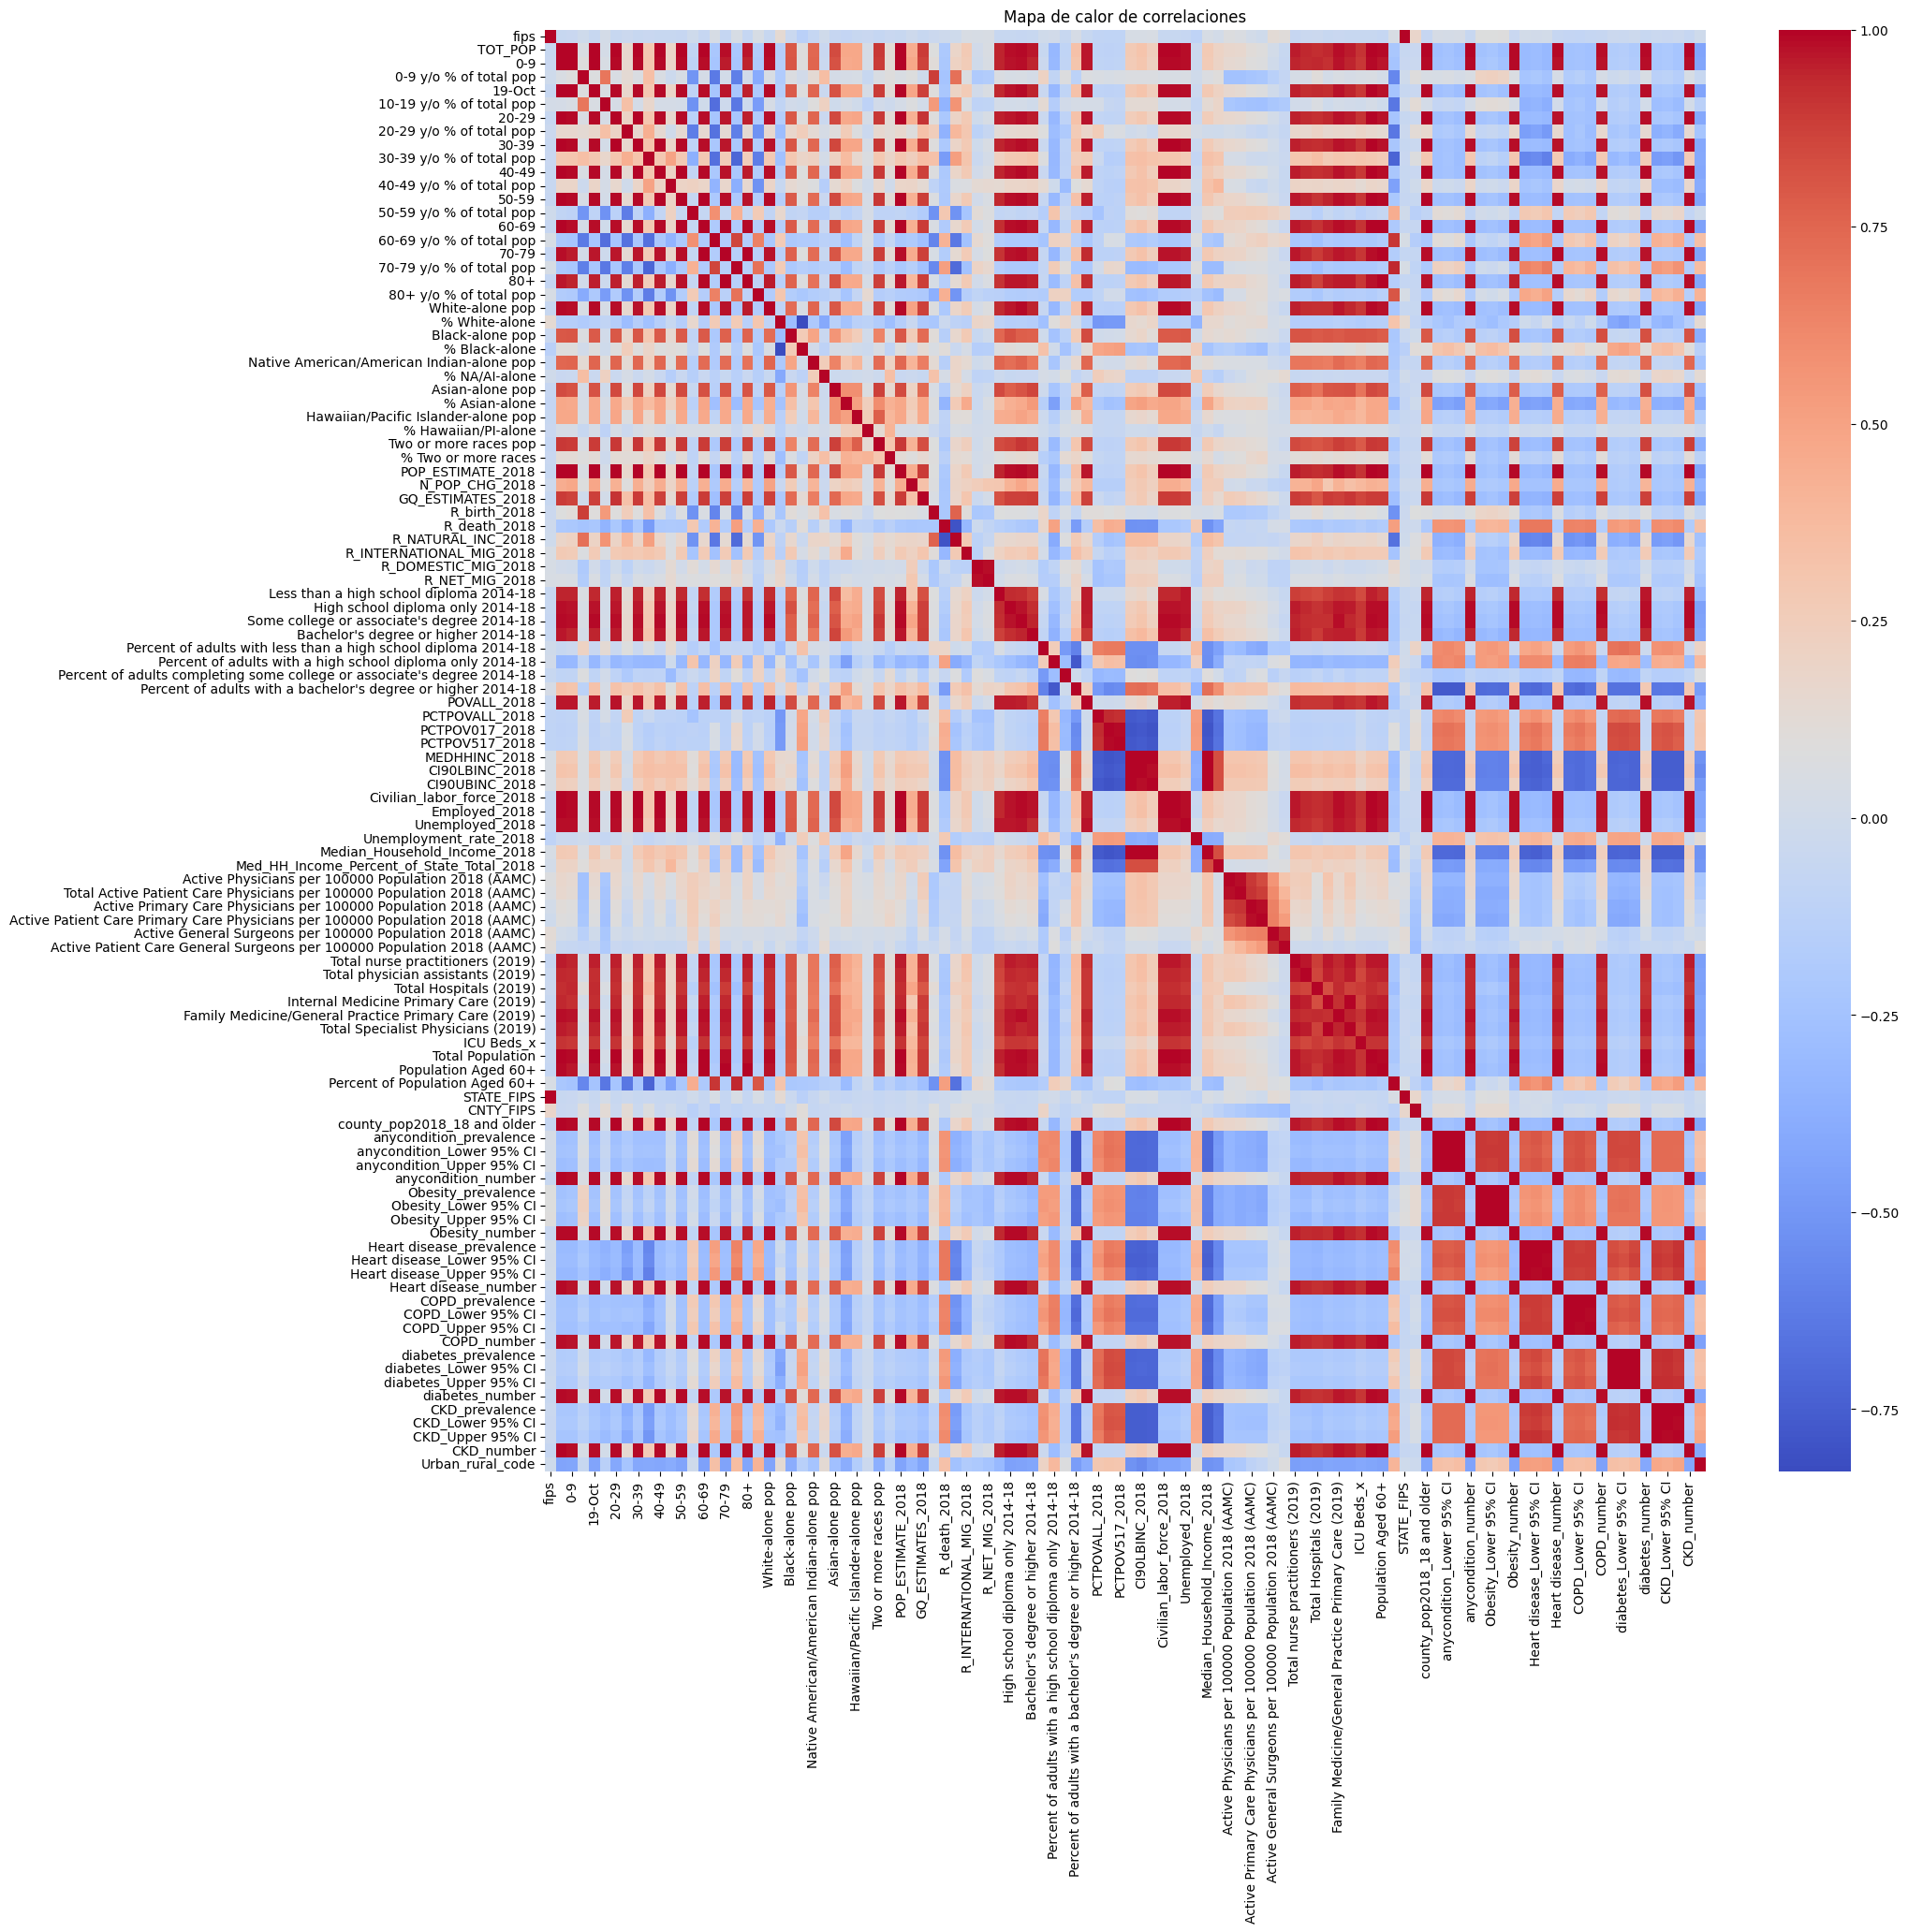

In [9]:
num_cols = df.select_dtypes(include='number')

plt.figure(figsize=(20,20))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=False)
plt.title("Mapa de calor de correlaciones")
plt.show()

Un heatmap con tantos datos lo hace imposible de analizar, por lo que se procede a divir en grupos para poder visualizar mejor los datos.

In [10]:
df = df.rename(columns={"19-Oct": "10-19"})
print(df.columns.tolist())

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '10-19', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less

In [11]:
data = {
    "g_demografia": [
        'fips', 'TOT_POP', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018',
        'GQ_ESTIMATES_2018', 'Total Population', 'county_pop2018_18 and older'
    ],

    "g_edades": [
        '0-9', '10-19', '20-29', '30-39', '40-49',
        '50-59', '60-69', '70-79', '80+'
    ],

    "g_edades_p": [
        '0-9 y/o % of total pop', '10-19 y/o % of total pop',
        '20-29 y/o % of total pop', '30-39 y/o % of total pop',
        '40-49 y/o % of total pop', '50-59 y/o % of total pop',
        '60-69 y/o % of total pop', '70-79 y/o % of total pop',
        '80+ y/o % of total pop'
    ],

    "g_etnia": [
        'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone',
        'Native American/American Indian-alone pop', '% NA/AI-alone',
        'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop',
        '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races'
    ],

    "g_migracion": [
        'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018',
        'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018'
    ],

    "g_nivel_edu": [
        'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
        "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18",
        'Percent of adults with less than a high school diploma 2014-18',
        'Percent of adults with a high school diploma only 2014-18',
        "Percent of adults completing some college or associate's degree 2014-18",
        "Percent of adults with a bachelor's degree or higher 2014-18"
    ],

    "g_economia": [
        'POVALL_2018', 'PCTPOVALL_2018','PCTPOV017_2018', 'PCTPOV517_2018',
        'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018',
        'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
        'Unemployment_rate_2018', 'Median_Household_Income_2018',
        'Med_HH_Income_Percent_of_State_Total_2018'
    ],

    "g_salud_rec": [
        'Active Physicians per 100000 Population 2018 (AAMC)',
        'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
        'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
        'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
        'Active General Surgeons per 100000 Population 2018 (AAMC)',
        'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
        'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
        'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
        'Family Medicine/General Practice Primary Care (2019)',
        'Total Specialist Physicians (2019)', 'ICU Beds_x'
    ],

    "g_salud_enf": [
        'anycondition_prevalence', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI',
        'anycondition_number', 'Obesity_prevalence', 'Obesity_Lower 95% CI',
        'Obesity_Upper 95% CI', 'Obesity_number', 'Heart disease_prevalence',
        'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
        'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI',
        'COPD_Upper 95% CI', 'COPD_number', 'diabetes_prevalence',
        'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number',
        'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number'
    ],

    "g_age_sub": [
        'Population Aged 60+', 'Percent of Population Aged 60+'
    ],

    "g_ubicación": [
        'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS',
        'CNTY_FIPS', 'Urban_rural_code'
    ]
}


In [12]:
# Extraemos las columnas del grupo g_edades
cols = data["g_edades"]

scaler = MinMaxScaler()
df_norm = df[cols].copy()
df_norm[cols] = scaler.fit_transform(df_norm[cols])

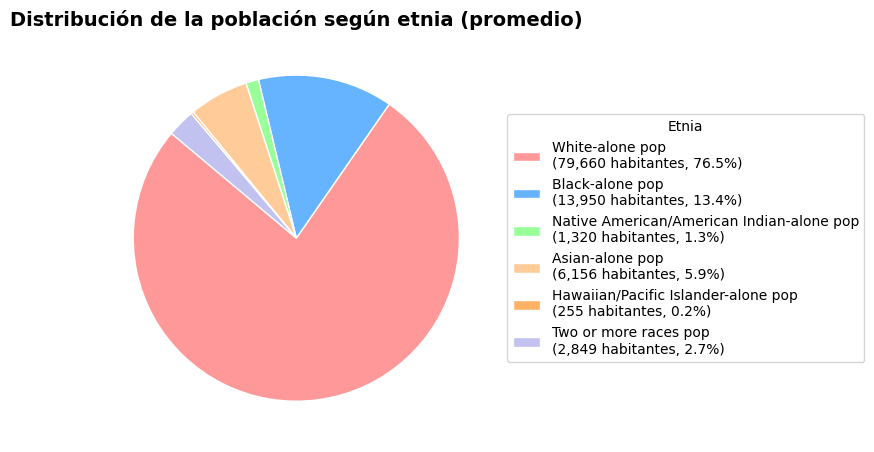

In [13]:

# Columnas de etnia con valores absolutos
cols = ["White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop",
        "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop"]

# Filtrar columnas que existan en el DataFrame
cols_presentes = [c for c in cols if c in df.columns]

# Valores absolutos
valores = df[cols_presentes].mean()

# Colores personalizados
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Gráfico de pastel sin porcentajes
colors = ["#FF9999","#66B3FF","#99FF99","#FFCC99","#FFB266",
          "#C2C2F0","#FFB3E6","#A0E7E5","#FFDB58"]

plt.figure(figsize=(8,8))
wedges, _ = plt.pie(
    valores,
    labels=None,  # Sin etiquetas en el gráfico
    startangle=140,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Creamos leyenda externa con porcentaje y valor absoluto
total = valores.sum()
legend_labels = [
    f"{col}\n({valores[col]:,.0f} habitantes, {valores[col]/total*100:.1f}%)"
    for col in cols_presentes
]

plt.legend(
    wedges,
    legend_labels,
    title="Etnia",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población según etnia (promedio)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


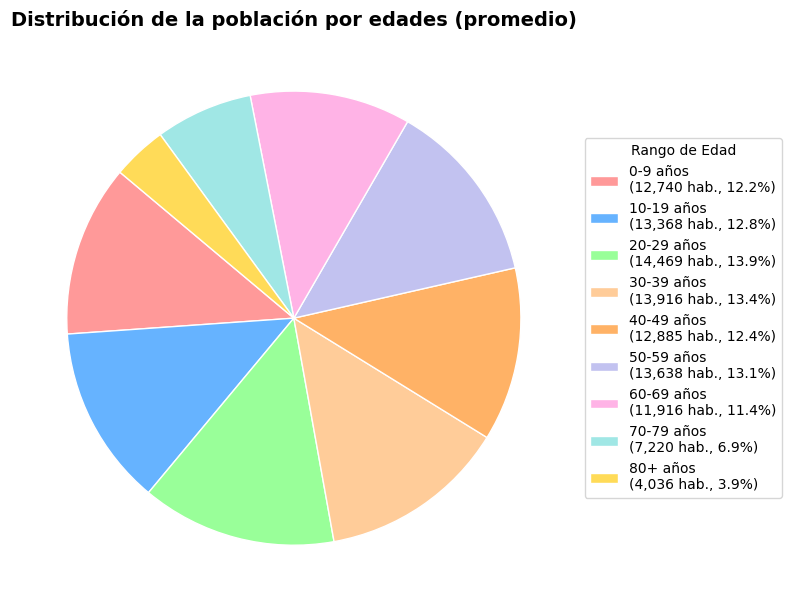

In [14]:

# Columnas de edades (totales)
cols = data["g_edades"]

# Filtrar columnas que existan en el DataFrame
cols_presentes = [c for c in cols if c in df.columns]

# Valores absolutos
valores = df[cols_presentes].mean()

# Colores personalizados
colors = ["#7CCF8E", "#F7A072", "#7BA3CC", "#E3A0FF", "#FF9F80", "#A0D1FF", "#FFD580", "#B0FF80", "#FF80BF"]

# Gráfico de pastel sin etiquetas internas
plt.figure(figsize=(8,8))

colors = ["#FF9999","#66B3FF","#99FF99","#FFCC99","#FFB266",
          "#C2C2F0","#FFB3E6","#A0E7E5","#FFDB58"]

wedges, _ = plt.pie(
    valores,
    labels=None,
    startangle=140,
    colors=colors[:len(cols_presentes)],
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa con porcentaje y total de habitantes
total = valores.sum()
extra_text_general = "años"
legend_labels = [
    f"{col} {extra_text_general}\n({valores[col]:,.0f} hab., {valores[col]/total*100:.1f}%)"
    for col in cols_presentes
]

plt.legend(
    wedges,
    legend_labels,
    title="Rango de Edad",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población por edades (promedio)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


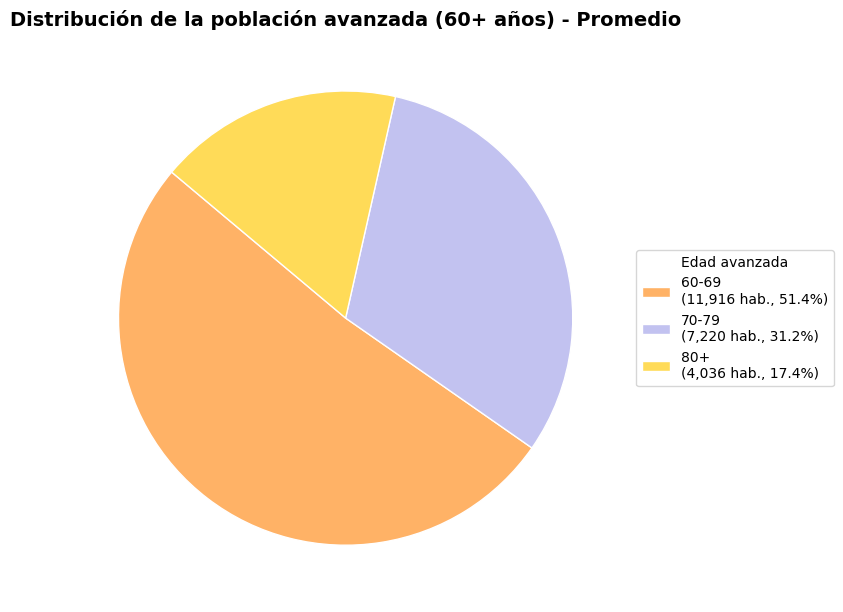

In [15]:
# Subgrupo de edad avanzada
cols = ["60-69", "70-79", "80+"]

# Filtrar columnas que existan en el DataFrame
cols_presentes = [c for c in cols if c in df.columns]

# Valores absolutos promedio
valores = df[cols_presentes].mean()

# Colores personalizados
colors = ["#FFB266", "#C2C2F0", "#FFDB58"]

# Gráfico de pastel sin etiquetas internas
plt.figure(figsize=(8,8))
wedges, _ = plt.pie(
    valores,
    labels=None,
    startangle=140,
    colors=colors[:len(cols_presentes)],
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa con valores absolutos y porcentaje
total = valores.sum()
legend_labels = [
    f"{col}\n({valores[col]:,.0f} hab., {valores[col]/total*100:.1f}%)"
    for col in cols_presentes
]

plt.legend(
    wedges,
    legend_labels,
    title="Edad avanzada",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población avanzada (60+ años) - Promedio", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


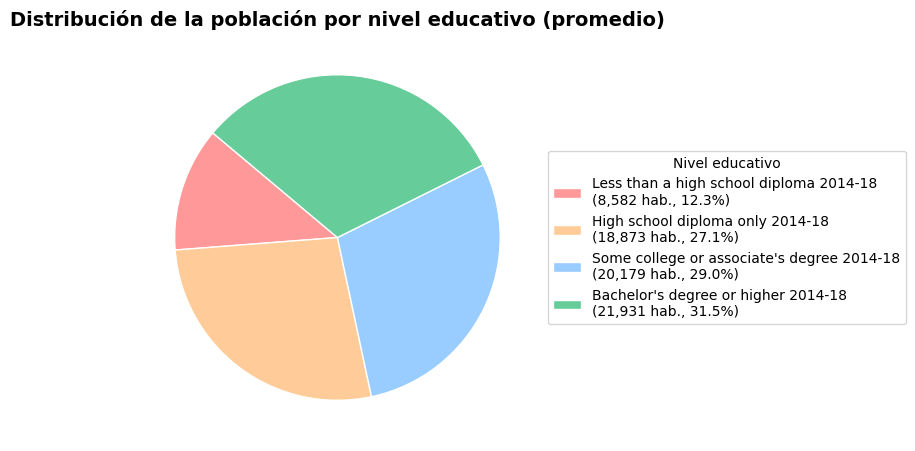

In [16]:
# Grupo de nivel educativo
cols = [
    "Less than a high school diploma 2014-18",
    "High school diploma only 2014-18",
    "Some college or associate's degree 2014-18",
    "Bachelor's degree or higher 2014-18"
]

# Filtrar columnas que existan en el DataFrame
cols_presentes = [c for c in cols if c in df.columns]

# Valores absolutos promedio
valores = df[cols_presentes].mean()

# Colores personalizados
colors = ["#FF9999", "#FFCC99", "#99CCFF", "#66CC99"]

# Gráfico de pastel sin etiquetas internas
plt.figure(figsize=(8,8))
wedges, _ = plt.pie(
    valores,
    labels=None,
    startangle=140,
    colors=colors[:len(cols_presentes)],
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa con valores absolutos y porcentaje
total = valores.sum()
legend_labels = [
    f"{col}\n({valores[col]:,.0f} hab., {valores[col]/total*100:.1f}%)"
    for col in cols_presentes
]

plt.legend(
    wedges,
    legend_labels,
    title="Nivel educativo",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población por nivel educativo (promedio)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


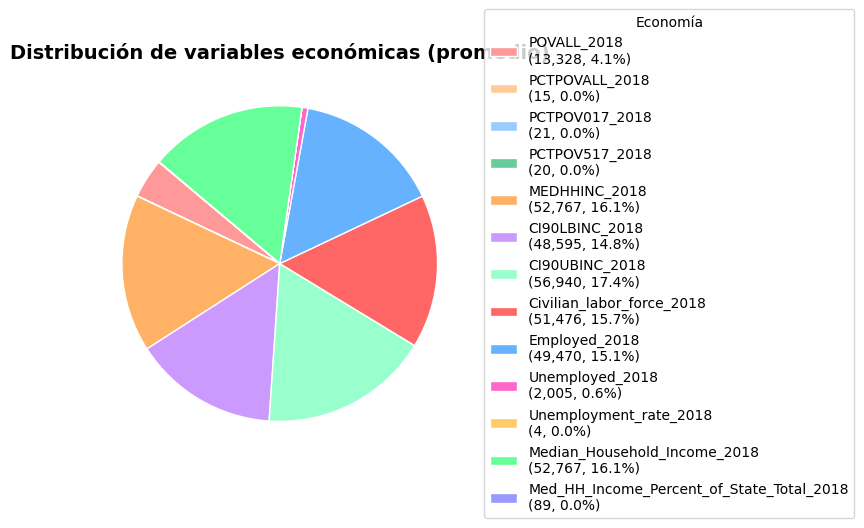

In [17]:
# Grupo de economía
cols = [
    "POVALL_2018", "PCTPOVALL_2018", "PCTPOV017_2018", "PCTPOV517_2018",
    "MEDHHINC_2018", "CI90LBINC_2018", "CI90UBINC_2018",
    "Civilian_labor_force_2018", "Employed_2018", "Unemployed_2018",
    "Unemployment_rate_2018", "Median_Household_Income_2018",
    "Med_HH_Income_Percent_of_State_Total_2018"
]

# Filtrar columnas que existan en el DataFrame
cols_presentes = [c for c in cols if c in df.columns]

# Valores promedio
valores = df[cols_presentes].mean()

# Colores personalizados (puedes ajustar según tu gusto)
colors = [
    "#FF9999", "#FFCC99", "#99CCFF", "#66CC99", "#FFB266",
    "#CC99FF", "#99FFCC", "#FF6666", "#66B2FF", "#FF66CC",
    "#FFCC66", "#66FF99", "#9999FF"
]

# Gráfico de pastel sin etiquetas internas
plt.figure(figsize=(8,8))
wedges, _ = plt.pie(
    valores,
    labels=None,
    startangle=140,
    colors=colors[:len(cols_presentes)],
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa con valores absolutos y porcentaje
total = valores.sum()
legend_labels = [
    f"{col}\n({valores[col]:,.0f}, {valores[col]/total*100:.1f}%)"
    for col in cols_presentes
]

plt.legend(
    wedges,
    legend_labels,
    title="Economía",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de variables económicas (promedio)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


Economia

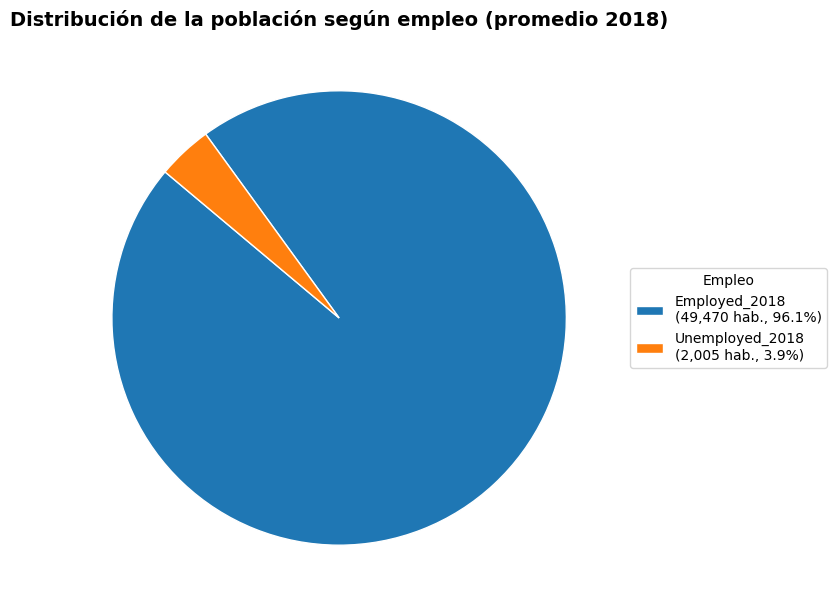

In [18]:


# Columnas de empleo
cols_empleo = ["Employed_2018", "Unemployed_2018"]

# Filtrar columnas presentes en el DataFrame
cols_presentes = [c for c in cols_empleo if c in df.columns]

# Calcular valores promedio
valores = df[cols_presentes].mean()

# Colores personalizados
colors = ["#1f77b4", "#ff7f0e"]

# Gráfico de pastel sin etiquetas internas
plt.figure(figsize=(8,8))
wedges, _ = plt.pie(
    valores,
    labels=None,  # sin etiquetas en el gráfico
    startangle=140,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Crear leyenda externa con valor absoluto y porcentaje
total = valores.sum()
legend_labels = [
    f"{col}\n({valores[col]:,.0f} hab., {valores[col]/total*100:.1f}%)"
    for col in cols_presentes
]

plt.legend(
    wedges,
    legend_labels,
    title="Empleo",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población según empleo (promedio 2018)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


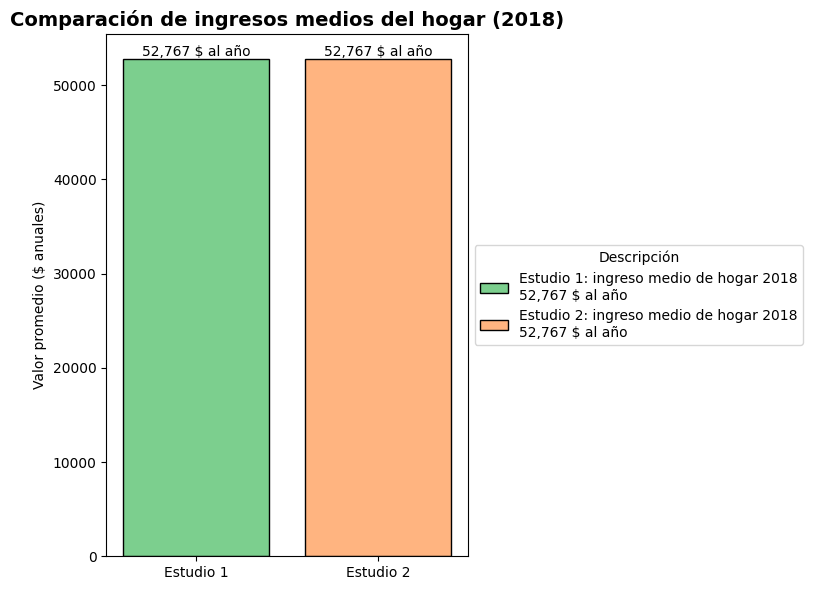

In [19]:

# Columnas de ingresos a mostrar
cols_ingresos = ["MEDHHINC_2018", "Median_Household_Income_2018"]

# Filtrar columnas presentes en el DataFrame
cols_presentes = [c for c in cols_ingresos if c in df.columns]

# Calcular valores promedio
valores = df[cols_presentes].mean()

# Colores personalizados
colors = ["#7CCF8E", "#FFB480"]

# Gráfico de barras
plt.figure(figsize=(8,6))
bars = plt.bar(["Estudio 1", "Estudio 2"], valores, color=colors, edgecolor="black")

# Añadir etiquetas con valor sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f"{height:,.0f} $ al año", 
             ha="center", va="bottom", fontsize=10)

# Leyenda externa
legend_labels = [
    f"Estudio 1: ingreso medio de hogar 2018\n{valores[cols_presentes[0]]:,.0f} $ al año",
    f"Estudio 2: ingreso medio de hogar 2018\n{valores[cols_presentes[1]]:,.0f} $ al año"
]

plt.legend(bars, legend_labels, title="Descripción", bbox_to_anchor=(1, 0.5), loc="center left")

plt.title("Comparación de ingresos medios del hogar (2018)", fontsize=14, fontweight="bold")
plt.ylabel("Valor promedio ($ anuales)")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribución de la población según situación de pobreza (2018)')

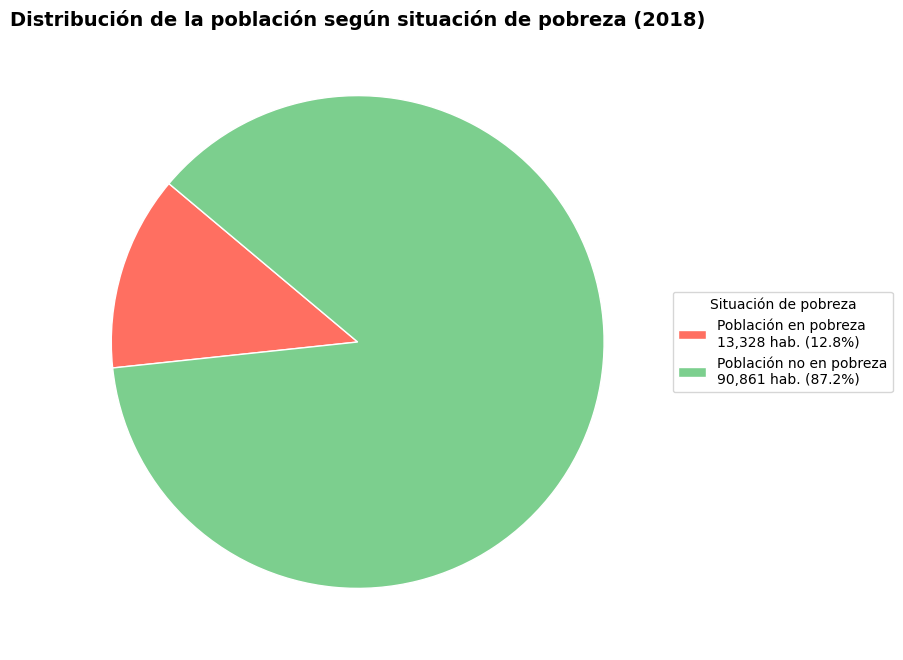

In [20]:
# Columnas de pobreza
cols_pobreza = ["POVALL_2018", "PCTPOVALL_2018"]  # Valor absoluto y % total población

# Filtrar columnas presentes en el DataFrame
cols_presentes = [c for c in cols_pobreza if c in df.columns]

# Tomamos solo el valor absoluto para el pastel
valores = df[cols_presentes[0]]  # POVALL_2018

# Colores personalizados
colors = ["#FF6F61"]  # Color único para pobreza, se puede añadir más si se separa por grupos

# Gráfico de pastel
plt.figure(figsize=(8,8))
wedges, _ = plt.pie(
    [valores.mean(), df["TOT_POP"].mean() - valores.mean()],  # Población pobre vs no pobre
    labels=None,
    startangle=140,
    colors=["#FF6F61", "#7CCF8E"],
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa
total = df["TOT_POP"].mean()
legend_labels = [
    f"Población en pobreza\n{valores.mean():,.0f} hab. ({valores.mean()/total*100:.1f}%)",
    f"Población no en pobreza\n{(total - valores.mean()):,.0f} hab. ({(100 - valores.mean()/total*100):.1f}%)"
]

plt.legend(
    wedges,
    legend_labels,
    title="Situación de pobreza",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población según situación de pobreza (2018)", fontsize=14, fontweight="bold"
)

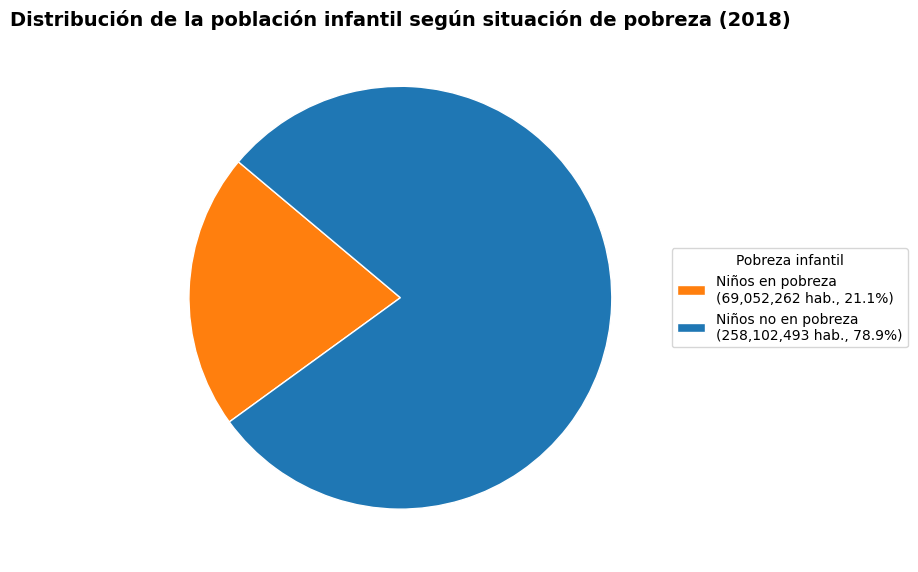

In [21]:

# Población total y porcentaje de niños en pobreza
pct_pobreza = df["PCTPOV017_2018"].mean()  # porcentaje promedio de pobreza infantil
total_pob = df["TOT_POP"].sum()  # total de población (aprox.)

# Calculamos número absoluto de niños en pobreza (aprox)
num_pobres = total_pob * pct_pobreza / 100
num_no_pobres = total_pob - num_pobres

valores = [num_pobres, num_no_pobres]
labels = ["Niños en pobreza", "Niños no en pobreza"]

# Colores
colors = ["#ff7f0e", "#1f77b4"]

# Gráfico de pastel
plt.figure(figsize=(8,8))
wedges, _ = plt.pie(
    valores,
    labels=None,  # sin etiquetas dentro
    startangle=140,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa con valor absoluto y porcentaje
total = sum(valores)
legend_labels = [
    f"{labels[i]}\n({valores[i]:,.0f} hab., {valores[i]/total*100:.1f}%)"
    for i in range(len(labels))
]

plt.legend(
    wedges,
    legend_labels,
    title="Pobreza infantil",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población infantil según situación de pobreza (2018)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


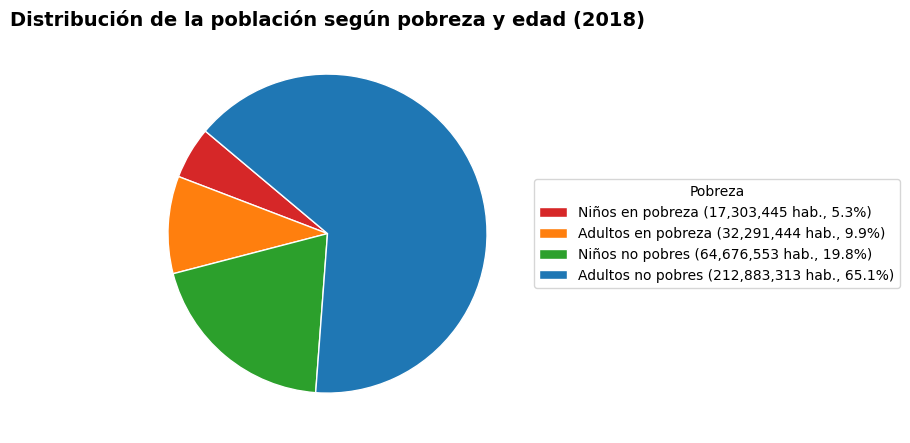

In [22]:
# Porcentajes y población
pob_total = df["TOT_POP"].sum()
pob_infantil = df[["0-9", "10-19"]].sum().sum()  # Ajustaremos 10-19 a solo 10-17 si queremos exacto

pct_pob_total = df["PCTPOVALL_2018"].mean() / 100
pct_pob_infantil = df["PCTPOV017_2018"].mean() / 100

# Calculamos cada sector en número de personas
n_pob_infantil = int(pob_infantil * pct_pob_infantil)
n_pob_adulto = int(pob_total * pct_pob_total) - n_pob_infantil
n_no_pob_infantil = int(pob_infantil) - n_pob_infantil
n_no_pob_adulto = int(pob_total) - (n_pob_infantil + n_pob_adulto + n_no_pob_infantil)  # Ajuste final

valores = [n_pob_infantil, n_pob_adulto, n_no_pob_infantil, n_no_pob_adulto]
labels = ["Niños en pobreza", "Adultos en pobreza", "Niños no pobres", "Adultos no pobres"]

colors = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4"]

# Gráfico de pastel
plt.figure(figsize=(8,8))
wedges, _ = plt.pie(valores, labels=None, startangle=140, colors=colors, wedgeprops={"linewidth": 1, "edgecolor": "white"})

# Leyenda externa con población y porcentaje
total = sum(valores)
legend_labels = [f"{lab} ({val:,} hab., {val/total*100:.1f}%)" for lab, val in zip(labels, valores)]

plt.legend(wedges, legend_labels, title="Pobreza", bbox_to_anchor=(1, 0.5), loc="center left")
plt.title("Distribución de la población según pobreza y edad (2018)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


SALUD

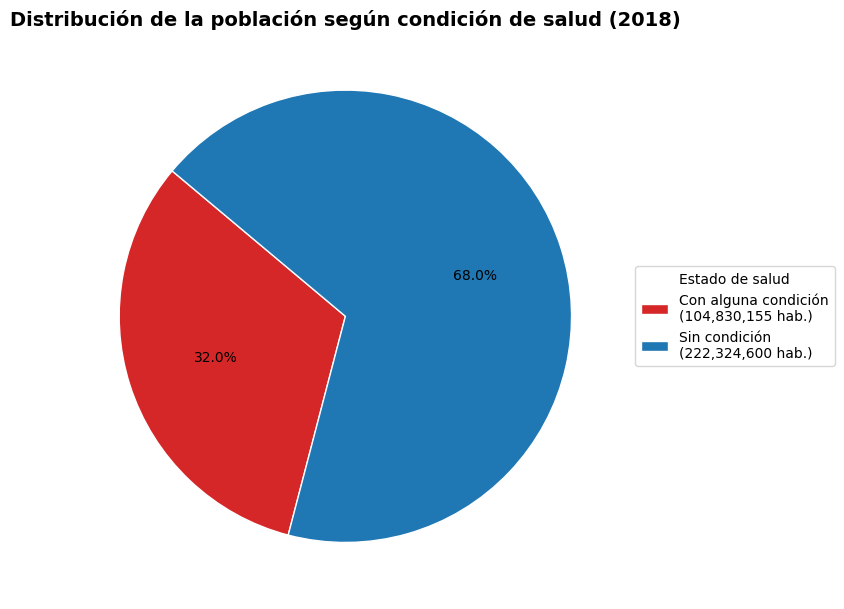

In [23]:


# Variables de salud general
total_poblacion = df["TOT_POP"].sum()  # Total población
enfermos = df["anycondition_number"].sum()  # Número de personas con alguna condición
no_enfermos = total_poblacion - enfermos  # Número de personas sin condiciones

# Valores y etiquetas
valores = [enfermos, no_enfermos]
etiquetas = ["Con alguna condición", "Sin condición"]

# Colores personalizados
colors = ["#d62728", "#1f77b4"]

# Función para mostrar solo porcentaje dentro del gráfico
def autopct_func(pct):
    return f"{pct:.1f}%"

# Gráfico de pastel
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    valores,
    labels=None,  # Quitamos etiquetas internas
    autopct=autopct_func,
    startangle=140,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa con número absoluto
plt.legend(
    wedges,
    [f"{etiquetas[i]}\n({valores[i]:,} hab.)" for i in range(len(valores))],
    title="Estado de salud",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población según condición de salud (2018)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


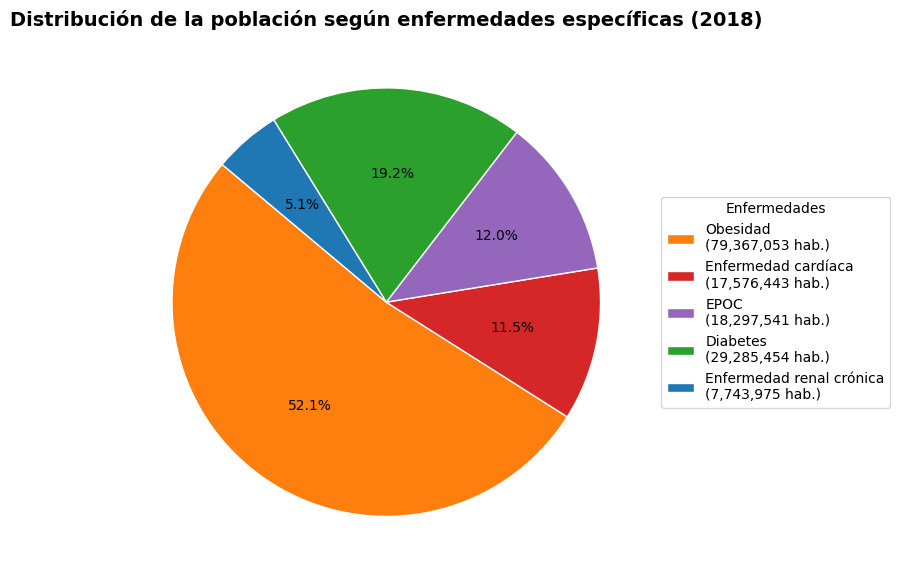

In [24]:

# Columnas de número de personas por enfermedad
cols_enf = ["Obesity_number", "Heart disease_number", "COPD_number", "diabetes_number", "CKD_number"]
etiquetas = ["Obesidad", "Enfermedad cardíaca", "EPOC", "Diabetes", "Enfermedad renal crónica"]

# Filtrar columnas existentes
cols_presentes = [c for c in cols_enf if c in df.columns]

# Valores absolutos
valores = [df[c].sum() for c in cols_presentes]

# Colores personalizados
colors = ["#ff7f0e", "#d62728", "#9467bd", "#2ca02c", "#1f77b4"]

# Función para mostrar porcentaje dentro del gráfico
def autopct_func(pct):
    return f"{pct:.1f}%"

# Gráfico de pastel
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    valores,
    labels=None,
    autopct=autopct_func,
    startangle=140,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa con número absoluto
plt.legend(
    wedges,
    [f"{etiquetas[i]}\n({valores[i]:,} hab.)" for i in range(len(valores))],
    title="Enfermedades",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de la población según enfermedades específicas (2018)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


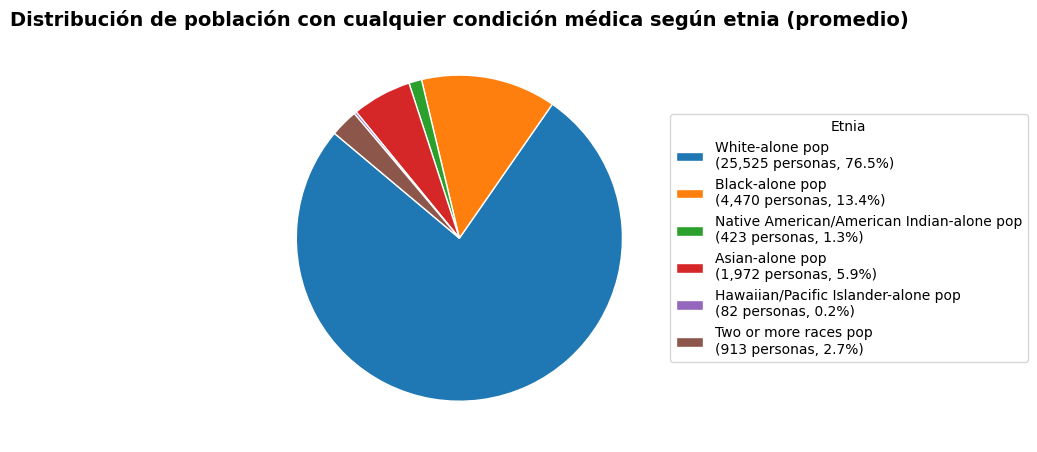

In [25]:


# Columnas de etnia con condición general de salud
cols = ["White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop",
        "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop"]

# Filtrar columnas presentes en el DataFrame
cols_presentes = [c for c in cols if c in df.columns]

# Valores absolutos de población total por etnia
poblacion_total = df[cols_presentes].mean()

# Número de personas con cualquier condición
cols_enfermedad = ["anycondition_number"]  # Total enfermos por grupo étnico no segmentado, se puede adaptar si hay desagregado
total_enfermos = df[cols_enfermedad].mean().values[0]

# Calcular prevalencia relativa por etnia
# Para simplificar, asumimos distribución proporcional a población (se puede ajustar si hay datos desagregados)
valores = poblacion_total * (total_enfermos / poblacion_total.sum())

# Colores personalizados
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Gráfico de pastel sin etiquetas internas
plt.figure(figsize=(8,8))
wedges, _ = plt.pie(
    valores,
    labels=None,
    startangle=140,
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda externa mostrando porcentaje + número absoluto de enfermos
total_valores = valores.sum()
legend_labels = [
    f"{col}\n({valores[col]:,.0f} personas, {valores[col]/total_valores*100:.1f}%)"
    for col in cols_presentes
]

plt.legend(
    wedges,
    legend_labels,
    title="Etnia",
    bbox_to_anchor=(1, 0.5),
    loc="center left"
)

plt.title("Distribución de población con cualquier condición médica según etnia (promedio)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


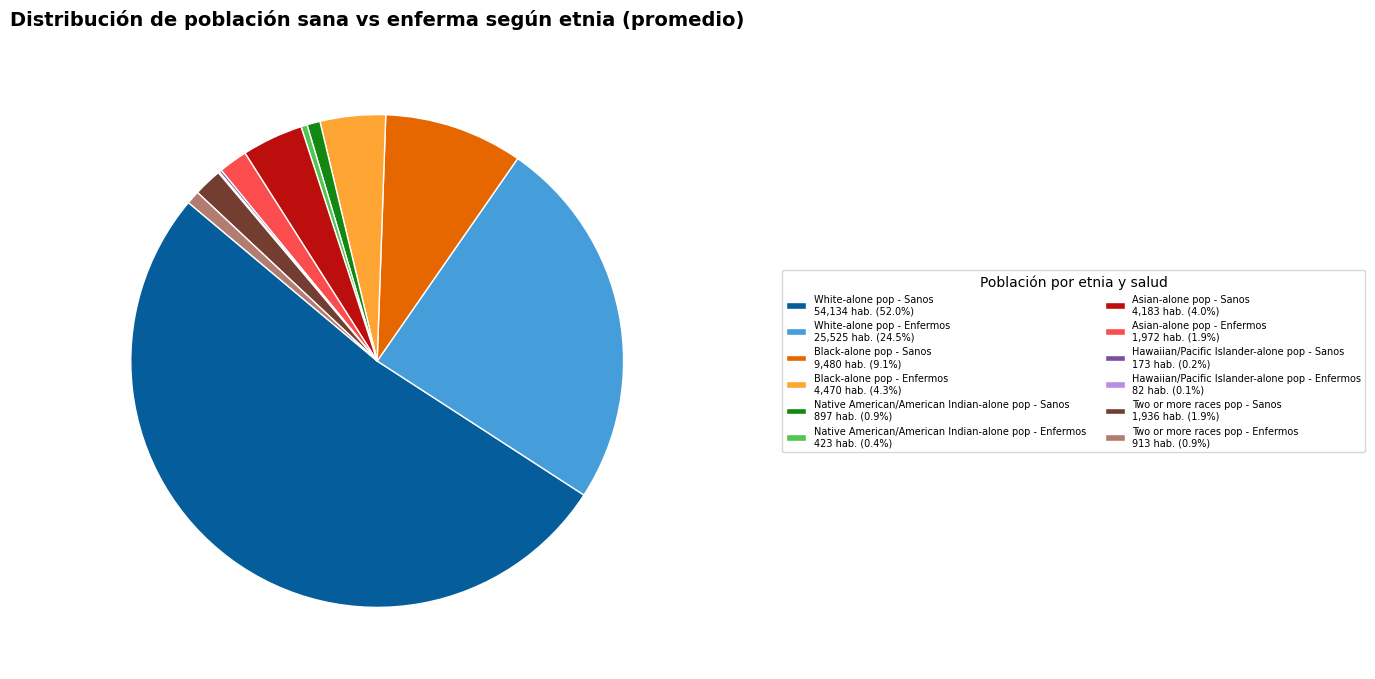

In [26]:
# Columnas de etnia
etnias = [
    "White-alone pop", "Black-alone pop",
    "Native American/American Indian-alone pop", "Asian-alone pop",
    "Hawaiian/Pacific Islander-alone pop", "Two or more races pop"
]

# Filtrar etnias presentes y con datos válidos (no NaN)
etnias_presentes = [e for e in etnias if e in df.columns and df[e].mean() > 0]

# Población total por etnia
poblacion_total = df[etnias_presentes].mean()
total_enfermos = df["anycondition_number"].mean()

# Estimación de enfermos y sanos
enfermos = poblacion_total / poblacion_total.sum() * total_enfermos
sanos = poblacion_total - enfermos

# Colores base por etnia
base_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Función para generar tonos claros y oscuros
def tonos_claro_oscuro(color):
    c = mcolors.to_rgb(color)
    claro = tuple(min(1, x + 0.15) for x in c)
    oscuro = tuple(max(0, x - 0.1) for x in c)
    return oscuro, claro

colors = []
valores = []
labels = []

for i, e in enumerate(etnias_presentes):
    oscuro, claro = tonos_claro_oscuro(base_colors[i])
    valores.extend([sanos[e], enfermos[e]])
    labels.extend([
        f"{e} - Sanos",
        f"{e} - Enfermos"
    ])
    colors.extend([oscuro, claro])

valores = pd.Series(valores)

# ---------- GRÁFICO ----------
plt.figure(figsize=(11,8))
wedges, _ = plt.pie(
    valores,
    labels=None,
    colors=colors,
    startangle=140,
    wedgeprops={"linewidth":1, "edgecolor":"white"}
)

# Leyenda
total = valores.sum()
legend_labels = [
    f"{labels[i]}\n{valores[i]:,.0f} hab. ({valores[i]/total*100:.1f}%)"
    for i in range(len(valores))
]

plt.legend(
    wedges,
    legend_labels,
    title="Población por etnia y salud",
    bbox_to_anchor=(1.15, 0.5),
    loc="center left",
    fontsize=7,
    ncol=2
)

plt.title("Distribución de población sana vs enferma según etnia (promedio)",
          fontsize=14, fontweight="bold", pad=20)

plt.subplots_adjust(right=0.75)
plt.show()


Este gráfico es algo grande y es necesario explicarlo, si antes sacaba por grupo donde se veía poblacion sana vs enferma, luego una de etnia vs sana y enferma, este mezcla la población total y separados por etnias, luego entre las etnias su propio valor entre sanos y enfermos. (igual lo exliqué peor) lo ejemplifico, arriba en el gráfico anterior a este, vemos que "white-alone" tiene un valor del 76,5% del total de la población, ahora de ese total de personas, el 52% son personas "sanas" y el 24,5% tienen alguna enfermedad (y la suma de esto es 52+24.5 = 76,5%) creo así me explico mejor.

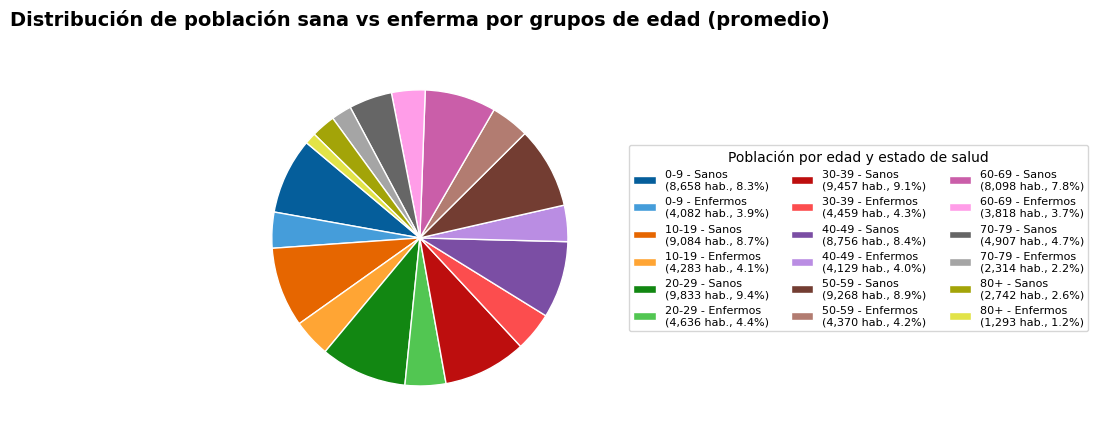

In [28]:


# Grupos de edad en tu dataset
edades = ["0-9", "10-19", "20-29", "30-39", "40-49", 
          "50-59", "60-69", "70-79", "80+"]

edades_presentes = [e for e in edades if e in df.columns]

# Promedio poblacional por edad
poblacion_total = df[edades_presentes].mean()

# Enfermos totales
total_enfermos = df["anycondition_number"].mean()

# Estimación de enfermos y sanos por edad
enfermos = poblacion_total / poblacion_total.sum() * total_enfermos
sanos = poblacion_total - enfermos

# Colores base (uno por edad)
base_colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22"
]

# Función para generar tonos claro/oscuro
def tonos_claro_oscuro(color):
    c = mcolors.to_rgb(color)
    claro = tuple(min(1, x + 0.15) for x in c)
    oscuro = tuple(max(0, x - 0.1) for x in c)
    return oscuro, claro

colors = []
labels = []
valores = []

for i, e in enumerate(edades_presentes):
    oscuro, claro = tonos_claro_oscuro(base_colors[i])
    valores.extend([sanos[e], enfermos[e]])
    labels.extend([f"{e} - Sanos", f"{e} - Enfermos"])
    colors.extend([oscuro, claro])

valores = pd.Series(valores)

# --- Gráfico ---
plt.figure(figsize=(9, 12))

wedges, _ = plt.pie(
    valores,
    labels=None,
    colors=colors,
    startangle=140,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

# Leyenda
total = valores.sum()
legend_labels = [
    f"{labels[i]}\n({valores[i]:,.0f} hab., {valores[i]/total*100:.1f}%)"
    for i in range(len(valores))
]

plt.legend(
    wedges,
    legend_labels,
    title="Población por edad y estado de salud",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    fontsize=8,
    ncol=3      # ← evita solapamiento
)

plt.title(
    "Distribución de población sana vs enferma por grupos de edad (promedio)",
    fontsize=14, fontweight="bold", pad=20
)

plt.tight_layout()
plt.show()


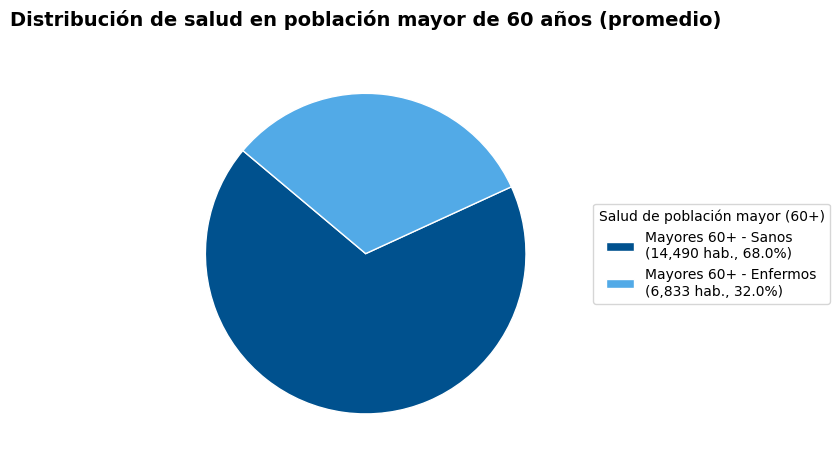

In [29]:
# --- Gráfico población 60+ sana vs enferma ---

# Población promedio de mayores
poblacion_mayores = df["Population Aged 60+"].mean()

# Total de enfermos general
total_enfermos = df["anycondition_number"].mean()

# Proporción estimada de enfermos dentro del grupo 60+
prop_60 = poblacion_mayores / df["TOT_POP"].mean()
enfermos_60 = total_enfermos * prop_60
sanos_60 = poblacion_mayores - enfermos_60

valores = [sanos_60, enfermos_60]
labels = ["Mayores 60+ - Sanos", "Mayores 60+ - Enfermos"]

# Colores claro/oscuro basados en un único color base
base_color = "#1f77b4"

c = mcolors.to_rgb(base_color)
claro = tuple(min(1, x + 0.2) for x in c)
oscuro = tuple(max(0, x - 0.15) for x in c)
colors = [oscuro, claro]

plt.figure(figsize=(7, 7))

wedges, _ = plt.pie(
    valores,
    labels=None,
    colors=colors,
    startangle=140,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)

total = sum(valores)
legend_labels = [
    f"{labels[i]}\n({valores[i]:,.0f} hab., {valores[i]/total*100:.1f}%)"
    for i in range(len(valores))
]

plt.legend(
    wedges,
    legend_labels,
    title="Salud de población mayor (60+)",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    fontsize=10
)

plt.title("Distribución de salud en población mayor de 60 años (promedio)", 
          fontsize=14, fontweight="bold", pad=20)

plt.tight_layout()
plt.show()


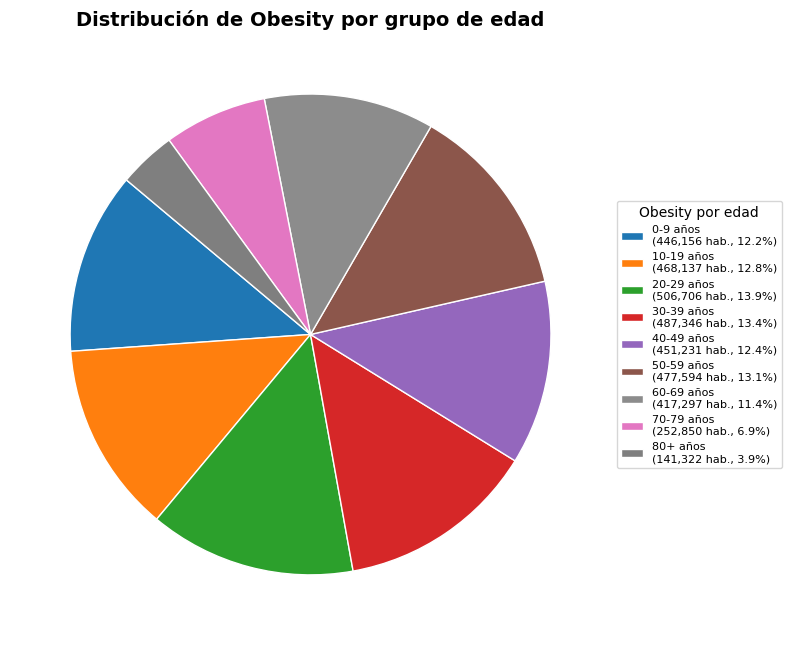

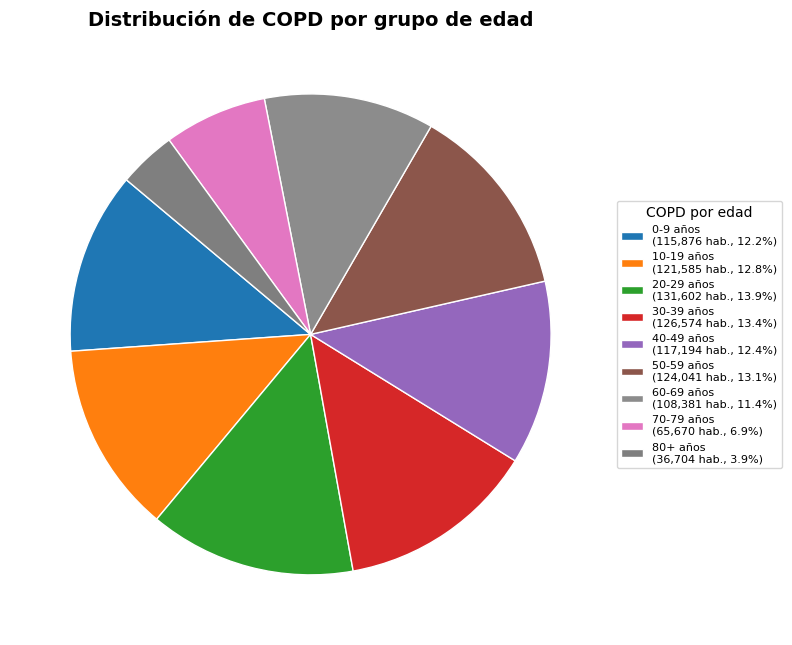

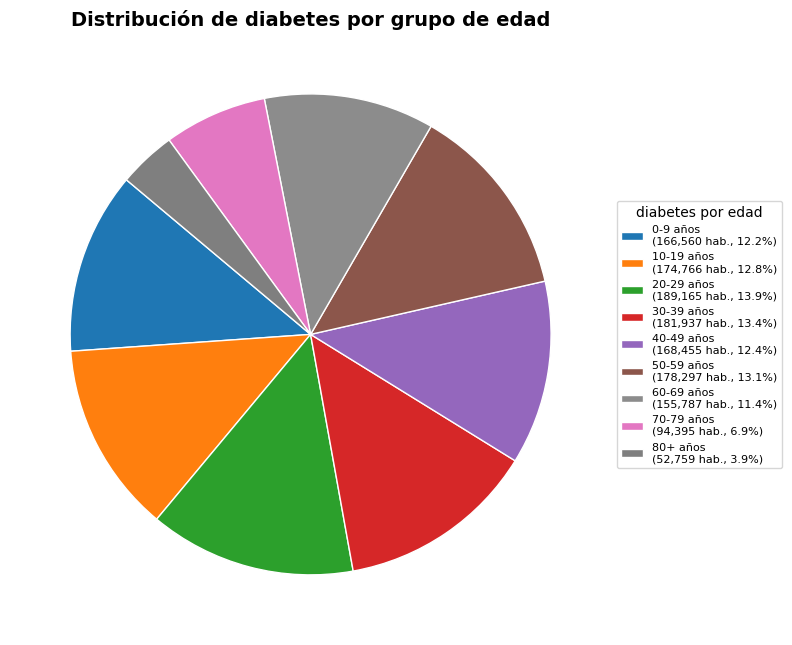

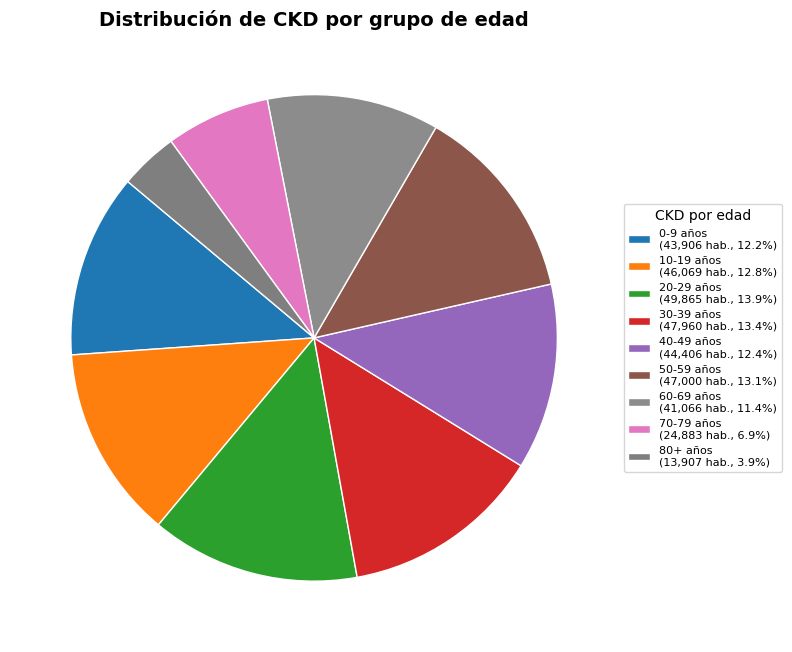

In [41]:

# Enfermedades a analizar
enfermedades = ["Obesity_prevalence", "Heart_disease_prevalence",
                "COPD_prevalence", "diabetes_prevalence", "CKD_prevalence"]

# Grupos de edad
edades = ["0-9", "10-19", "20-29", "30-39", "40-49",
          "50-59", "60-69", "70-79", "80+"]

# Colores para cada grupo de edad
base_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
               "#8c564b", "#8c8c8c", "#e377c2", "#7f7f7f"]

# Filtrar enfermedades presentes
enfermedades_presentes = [e for e in enfermedades if e in df.columns]

for enf in enfermedades_presentes:
    # Prevalencia por edad
    prevalence = df[edades].mean() * df[enf].mean()  # estimación absoluta
    prevalence = prevalence.fillna(0)
    
    plt.figure(figsize=(8,8))
    
    wedges, _ = plt.pie(
        prevalence,
        labels=None,
        startangle=140,
        colors=base_colors[:len(edades)],
        wedgeprops={"linewidth":1, "edgecolor":"white"}
    )
    
    total = prevalence.sum()
    legend_labels = [f"{edad} años\n({prevalence[edad]:,.0f} hab., {prevalence[edad]/total*100:.1f}%)"
                     for edad in edades]
    
    plt.legend(
        wedges,
        legend_labels,
        title=f"{enf.replace('_prevalence','')} por edad",
        bbox_to_anchor=(1, 0.5),
        loc="center left",
        fontsize=8
    )
    
    plt.title(f"Distribución de {enf.replace('_prevalence','')} por grupo de edad", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()


PREPARANDO MODELO

In [58]:
# --- X: variables predictoras ---
# Edad (proporción de población por grupo de edad)
edades = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]
X_edades = df[edades].div(df["TOT_POP"], axis=0)
X_edades.columns = [f"age_{col}" for col in edades]

# Etnia (proporción de población por etnia)
etnias = ["White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop",
          "Asian-alone pop", "Hawaiian/Pacific Islander-alone pop", "Two or more races pop"]
X_etnia = df[etnias].div(df["TOT_POP"], axis=0)
X_etnia.columns = [f"ethnicity_{col.split()[0]}" for col in etnias]

# Nivel educativo (proporción de población por nivel de estudios)
educ_cols = ["Percent of adults with less than a high school diploma 2014-18",
             "Percent of adults with a high school diploma only 2014-18",
             "Percent of adults completing some college or associate's degree 2014-18",
             "Percent of adults with a bachelor's degree or higher 2014-18"]
X_edu = df[educ_cols].copy()
X_edu.columns = ["edu_less_HS", "edu_HS", "edu_some_college", "edu_Bachelors_plus"]

# Economía (ingresos y pobreza)
econ_cols = ["MEDHHINC_2018", "Med_HH_Income_Percent_of_State_Total_2018", "PCTPOVALL_2018"]
X_econ = df[econ_cols].copy()
X_econ.columns = ["med_income", "med_income_state_pct", "poverty_pct"]

# --- Unimos todas las variables predictoras ---
X = pd.concat([X_edades, X_etnia, X_edu, X_econ], axis=1)

# Revisamos
print(X.head())

# --- Y: variable objetivo ---
y = df["anycondition_prevalence"]  # prevalencia promedio de cualquier condición


    age_0-9  age_10-19  age_20-29  age_30-39  age_40-49  age_50-59  age_60-69  \
0  0.122066   0.137354   0.123703   0.127498   0.136364   0.139170   0.104782   
1  0.113553   0.123442   0.108150   0.115644   0.125391   0.137537   0.137289   
2  0.109803   0.118966   0.131345   0.128652   0.123548   0.131747   0.123628   
3  0.109643   0.115893   0.135223   0.138973   0.135625   0.139063   0.113616   
4  0.122666   0.130878   0.116563   0.119018   0.129219   0.135615   0.120418   

   age_70-79   age_80+  ethnicity_White-alone  ...  ethnicity_Asian-alone  \
0   0.072840  0.036222               0.767252  ...               0.012248   
1   0.096027  0.042968               0.872852  ...               0.011503   
2   0.090189  0.042120               0.490696  ...               0.004542   
3   0.076920  0.035045               0.768348  ...               0.002366   
4   0.085252  0.040370               0.958783  ...               0.003198   

   ethnicity_Hawaiian/Pacific  ethnicity_Two  edu_

In [59]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2512, 22) (628, 22) (2512,) (628,)


In [62]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

X_train_scaled.head()

,age_0-9,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80+,ethnicity_White-alone,...,ethnicity_Asian-alone,ethnicity_Hawaiian/Pacific,ethnicity_Two,edu_less_HS,edu_HS,edu_some_college,edu_Bachelors_plus,med_income,med_income_state_pct,poverty_pct
1292,0.102383,0.162374,-0.429454,-0.665485,-0.698327,0.585470,0.538689,0.402383,-0.117970,0.648457,...,-0.431441,-0.096315,-0.301256,0.116936,0.161338,0.185802,-0.302485,-0.173289,-0.032380,0.059489
2302,-0.754597,-0.836073,-0.736296,-0.785934,-0.073361,1.253363,1.194600,0.460098,0.651730,0.759892,...,-0.390334,-0.094787,-0.578354,-0.505673,1.977925,-1.351342,-0.429705,-0.504065,-0.710993,-0.022269
761,-0.717144,0.464170,1.320194,-0.128551,0.159743,-0.000813,-0.658567,-0.544560,-0.383537,0.538703,...,-0.181013,-0.090267,-0.452704,-0.409887,1.335132,-0.275341,-0.588730,0.138198,0.428284,-0.480111
2194,0.120407,0.576280,0.094875,0.335452,0.652423,0.247740,-0.570475,-0.479332,-0.613492,-0.579575,...,-0.023228,-0.053735,4.219485,-0.872853,-0.201980,0.800659,0.280606,0.649528,1.463539,-0.872547
1241,0.252809,0.234535,0.173362,0.070962,0.159841,-0.099992,-0.233037,-0.402188,-0.148575,-0.191312,...,0.508352,-0.092452,0.927792,-0.713210,0.301075,0.531659,-0.048045,-0.313903,-0.200795,0.353816


In [63]:


model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"Intercepto: {model.intercept_}")
print(f"Coeficientes: {model.coef_}")

Intercepto: 46.76305732484075
Coeficientes: [ 0.60475601 -0.26221874 -0.44543143 -0.6588994   0.44362206  0.57201232
 -0.63542455  0.48779455  0.51734947 -0.38632883  0.58309683 -0.14782243
 -0.44711084 -0.10899235  0.2744343  10.00377304 11.01284413  7.66247141
 11.69250053 -2.29885301  2.03470719  1.46943796]


In [64]:
y_pred = model.predict(X_test_scaled)
print(y_pred[:10])  # vemos las primeras 10 predicciones


[49.49161913 36.72499881 56.90064636 45.18202603 37.33811254 39.53836038
 43.64335166 54.66274348 46.33409116 30.16807358]


In [65]:


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"R²: {r2}")


Error cuadrático medio (MSE): 8.870368679225924
R²: 0.7818106868762711


In [68]:


# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Error absoluto medio
mae = mean_absolute_error(y_test, y_pred)

# R²
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


MSE: 8.87
MAE: 2.41
R²: 0.78


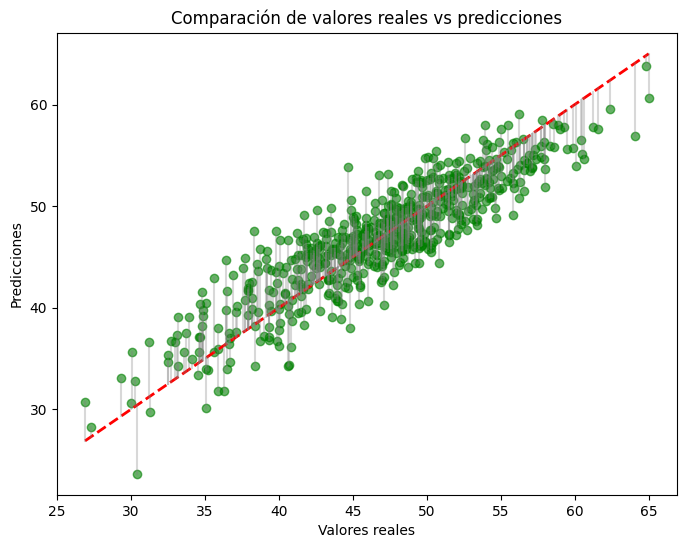

In [71]:


plt.figure(figsize=(8,6))

# Puntos verdes
plt.scatter(y_test, y_pred, color='green', alpha=0.6)

# Línea roja diagonal (valores perfectos)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Líneas de unión (predicción vs valor real)
for i in range(len(y_test)):
    plt.plot([y_test.iloc[i], y_test.iloc[i]], [y_test.iloc[i], y_pred[i]], color='gray', alpha=0.3)

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación de valores reales vs predicciones")
plt.show()


In [72]:
coef_df = pd.DataFrame({
    "Variable": X_train_scaled.columns,
    "Coeficiente": model.coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)

print(coef_df.head(10))  # las 10 más influyentes

                Variable  Coeficiente
18    edu_Bachelors_plus    11.692501
16                edu_HS    11.012844
15           edu_less_HS    10.003773
17      edu_some_college     7.662471
19            med_income    -2.298853
20  med_income_state_pct     2.034707
21           poverty_pct     1.469438
3              age_30-39    -0.658899
6              age_60-69    -0.635425
0                age_0-9     0.604756


In [75]:

# Instanciamos el escalador
scaler = StandardScaler()

# Ajustamos el escalador solo con los datos de entrenamiento
scaler.fit(X_train)

# Aplicamos el escalado a X_train y X_test
X_train_final = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_final  = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [76]:
# Instanciamos Lasso
lasso_model = Lasso(alpha=0.1, random_state=42)

# Entrenamos con los datos escalados
lasso_model.fit(X_train_final, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [77]:
print(f"Intercepto (b0): {lasso_model.intercept_}")
print("Coeficientes (b1-bN):")
for col, coef in zip(X_train_final.columns, lasso_model.coef_):
    print(f"{col}: {coef:.4f}")


Intercepto (b0): 46.76305732484076
Coeficientes (b1-bN):
age_0-9: 0.0000
age_10-19: -0.0000
age_20-29: -0.7662
age_30-39: -0.3918
age_40-49: 0.1130
age_50-59: 0.1576
age_60-69: -0.0000
age_70-79: 0.0000
age_80+: 0.0237
ethnicity_White-alone: -0.1621
ethnicity_Black-alone: 0.7106
ethnicity_Native: 0.0000
ethnicity_Asian-alone: -0.2437
ethnicity_Hawaiian/Pacific: -0.0000
ethnicity_Two: 0.0000
edu_less_HS: 0.8193
edu_HS: 0.6140
edu_some_college: -0.0000
edu_Bachelors_plus: -2.2527
med_income: -1.7895
med_income_state_pct: 1.4070
poverty_pct: 1.3117


In [78]:
y_pred_lasso = lasso_model.predict(X_test_final)


In [79]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"R²: {r2:.4f}")


Error cuadrático medio (MSE): 9.3397
R²: 0.7703


comparación entre prección y lasso

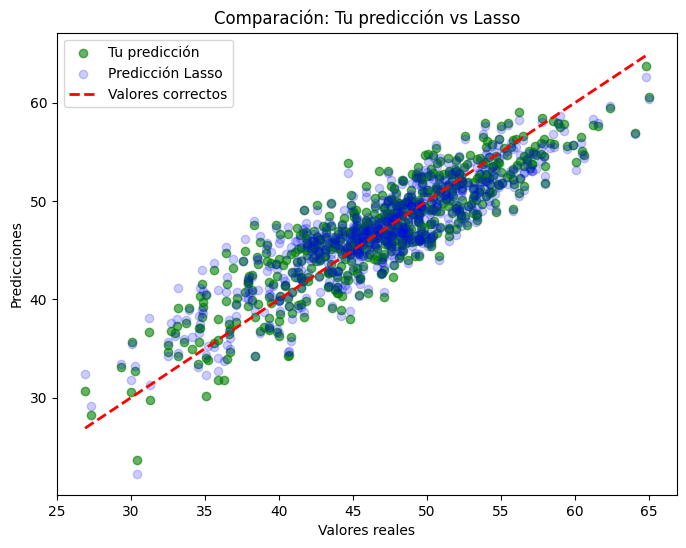

In [84]:
# --- 1️⃣ Modelo Lineal ---
model = LinearRegression()
model.fit(X_train_final, y_train)
y_pred_lineal = model.predict(X_test_final)

# --- 2️⃣ Modelo Lasso ---
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_final, y_train)
y_pred_lasso = lasso.predict(X_test_final)

# --- 3️⃣ Gráfico comparativo ---
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred_lineal, color='green', alpha=0.6, label='Tu predicción')
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.2, label='Predicción Lasso')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label='Valores correctos')

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación: Tu predicción vs Lasso")
plt.legend()
plt.show()

In [85]:

# Función para calcular métricas
def evaluar_modelo(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Evaluamos ambos modelos
metrics_lineal = evaluar_modelo(y_test, y_pred_lineal)
metrics_lasso = evaluar_modelo(y_test, y_pred_lasso)

# Mostramos resultados
print("Tu modelo lineal:")
print(f"MAE: {metrics_lineal[0]:.2f}, MSE: {metrics_lineal[1]:.2f}, RMSE: {metrics_lineal[2]:.2f}, R²: {metrics_lineal[3]:.2f}\n")

print("Modelo Lasso:")
print(f"MAE: {metrics_lasso[0]:.2f}, MSE: {metrics_lasso[1]:.2f}, RMSE: {metrics_lasso[2]:.2f}, R²: {metrics_lasso[3]:.2f}")


Tu modelo lineal:
MAE: 2.41, MSE: 8.87, RMSE: 2.98, R²: 0.78

Modelo Lasso:
MAE: 2.46, MSE: 9.34, RMSE: 3.06, R²: 0.77


In [88]:
# Carpeta donde se guardarán los archivos
save_path = "../data/processed/"
os.makedirs(save_path, exist_ok=True)  # crea la carpeta si no existe

# Guardamos X_train, X_test, y_train, y_test
X_train_final.to_csv(os.path.join(save_path, "X_train.csv"), index=False)
X_test_final.to_csv(os.path.join(save_path, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(save_path, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(save_path, "y_test.csv"), index=False)

print("Se ha guardado correctamente en", save_path)

Se ha guardado correctamente en ../data/processed/


In [91]:
# Guardar el modelo lineal entrenado
with open('../models/modelo_regresion_lineal_demographic_health.pkl', 'wb') as archive:
    pickle.dump(model, archive)